**Task 1: Identifying the Prediction Target**

The target variable is the column "y", which contains binary values "yes" and "no". This column represents whether the client subscribed to a term deposit, which is the oubjective of the assignment.

duration: This column tracks the call duration of the contact. One reason is that predicting call length does not answer the key objective of whether the client actually subscribed. Furthermore, using duration as a target is target leakage because the duration of a call is completely unknown before the call actually happens, meaning it isn't available at prediction time.

campaign: This column tracks the number of contacts performed during the campaign for a specific customer. It doesn't answer the primary objective of the assignment, which is predicting the binary outcome of the subscription.

In [1]:
import pandas as pd
import numpy as np

db = pd.read_csv("bank-additional.csv", sep = ";")

print("Dataset Shape:", db.shape) 
print("\nData Types:")
print(db.dtypes)

Dataset Shape: (4119, 21)

Data Types:
age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object


In [3]:
display(db.describe())

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [4]:
display(db.describe(include=['object']))

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,4119,4119,4119,4119,4119,4119,4119,4119,4119,4119,4119
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,1012,2509,1264,3315,2175,3349,2652,1378,860,3523,3668


In [5]:
db.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
5,32,services,single,university.degree,no,no,no,cellular,sep,thu,...,3,999,2,failure,-1.1,94.199,-37.5,0.884,4963.6,no
6,32,admin.,single,university.degree,no,yes,no,cellular,sep,mon,...,4,999,0,nonexistent,-1.1,94.199,-37.5,0.879,4963.6,no
7,41,entrepreneur,married,university.degree,unknown,yes,no,cellular,nov,mon,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
8,31,services,divorced,professional.course,no,no,no,cellular,nov,tue,...,1,999,1,failure,-0.1,93.200,-42.0,4.153,5195.8,no
9,35,blue-collar,married,basic.9y,unknown,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no


Numerical and categorical variables

In [6]:
numerical_variables = db.select_dtypes(include=['int64', 'float64']).columns.tolist() # [cite: 76]
categorical_variables= db.select_dtypes(include=['object']).columns.tolist() # [cite: 76]

print("Numerical Variables:\n", numerical_variables)
print("\nCategorical Variables:\n", categorical_variables)

Numerical Variables:
 ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

Categorical Variables:
 ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


Target Variable Distribution (%):
 no     89.05074
yes    10.94926
Name: y, dtype: float64


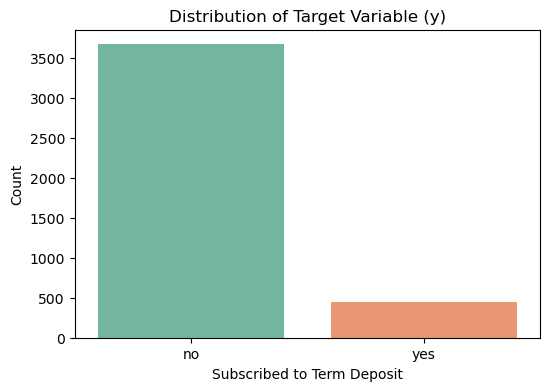

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

target_dist = db['y'].value_counts(normalize=True) * 100  
print("Target Variable Distribution (%):\n", target_dist)

plt.figure(figsize=(6, 4))
sns.countplot(x='y', data=db, palette='Set2')
plt.title('Distribution of Target Variable (y)')
plt.ylabel('Count')
plt.xlabel('Subscribed to Term Deposit')
plt.show()